In [3]:
import numpy as np
import pandas as pd
import functions, importlib
import datetime as dt
from numpy import mean
import matplotlib.pyplot as plt
n = 100  # every 100th line = 1% of the lines
df = pd.read_csv("data/steam_reviews.csv", header=0, skiprows=lambda i: i % n != 0)
pd.set_option('display.max_columns', 23)
df.info()
print('Reading finished!')

Reading finished!


# RQ1: Exploratory Data Analysis (EDA)
We are giver a dataset of reviews of the online gaming platform Steam. Each review is described through a series of attributes.\
The following is a brief summary of the charachteritics of the dataset.

The most relevant features of the dataset are the following: 

In [3]:
functions.summary(df)

Total elemnts in data set: 5,001,879
Number of reviews: 217,473
Number of attributes for each review: 23


,Description
Attibutes of the review,
author.steamid,Author identification number
app_name,Game name
timestamp_created,Date of review
language,Language of the review
review,The review itself
weighted_vote_score,Score of the review
author.playtime_forever,Author total playtime


Number of distinct games: 315
Number of distinct languages: 28
Reviews range from 2010-11-19 to 2021-01-23


# RQ2: Simple insights into the reviews

- Plot the number of reviews for each application in descending order

[]

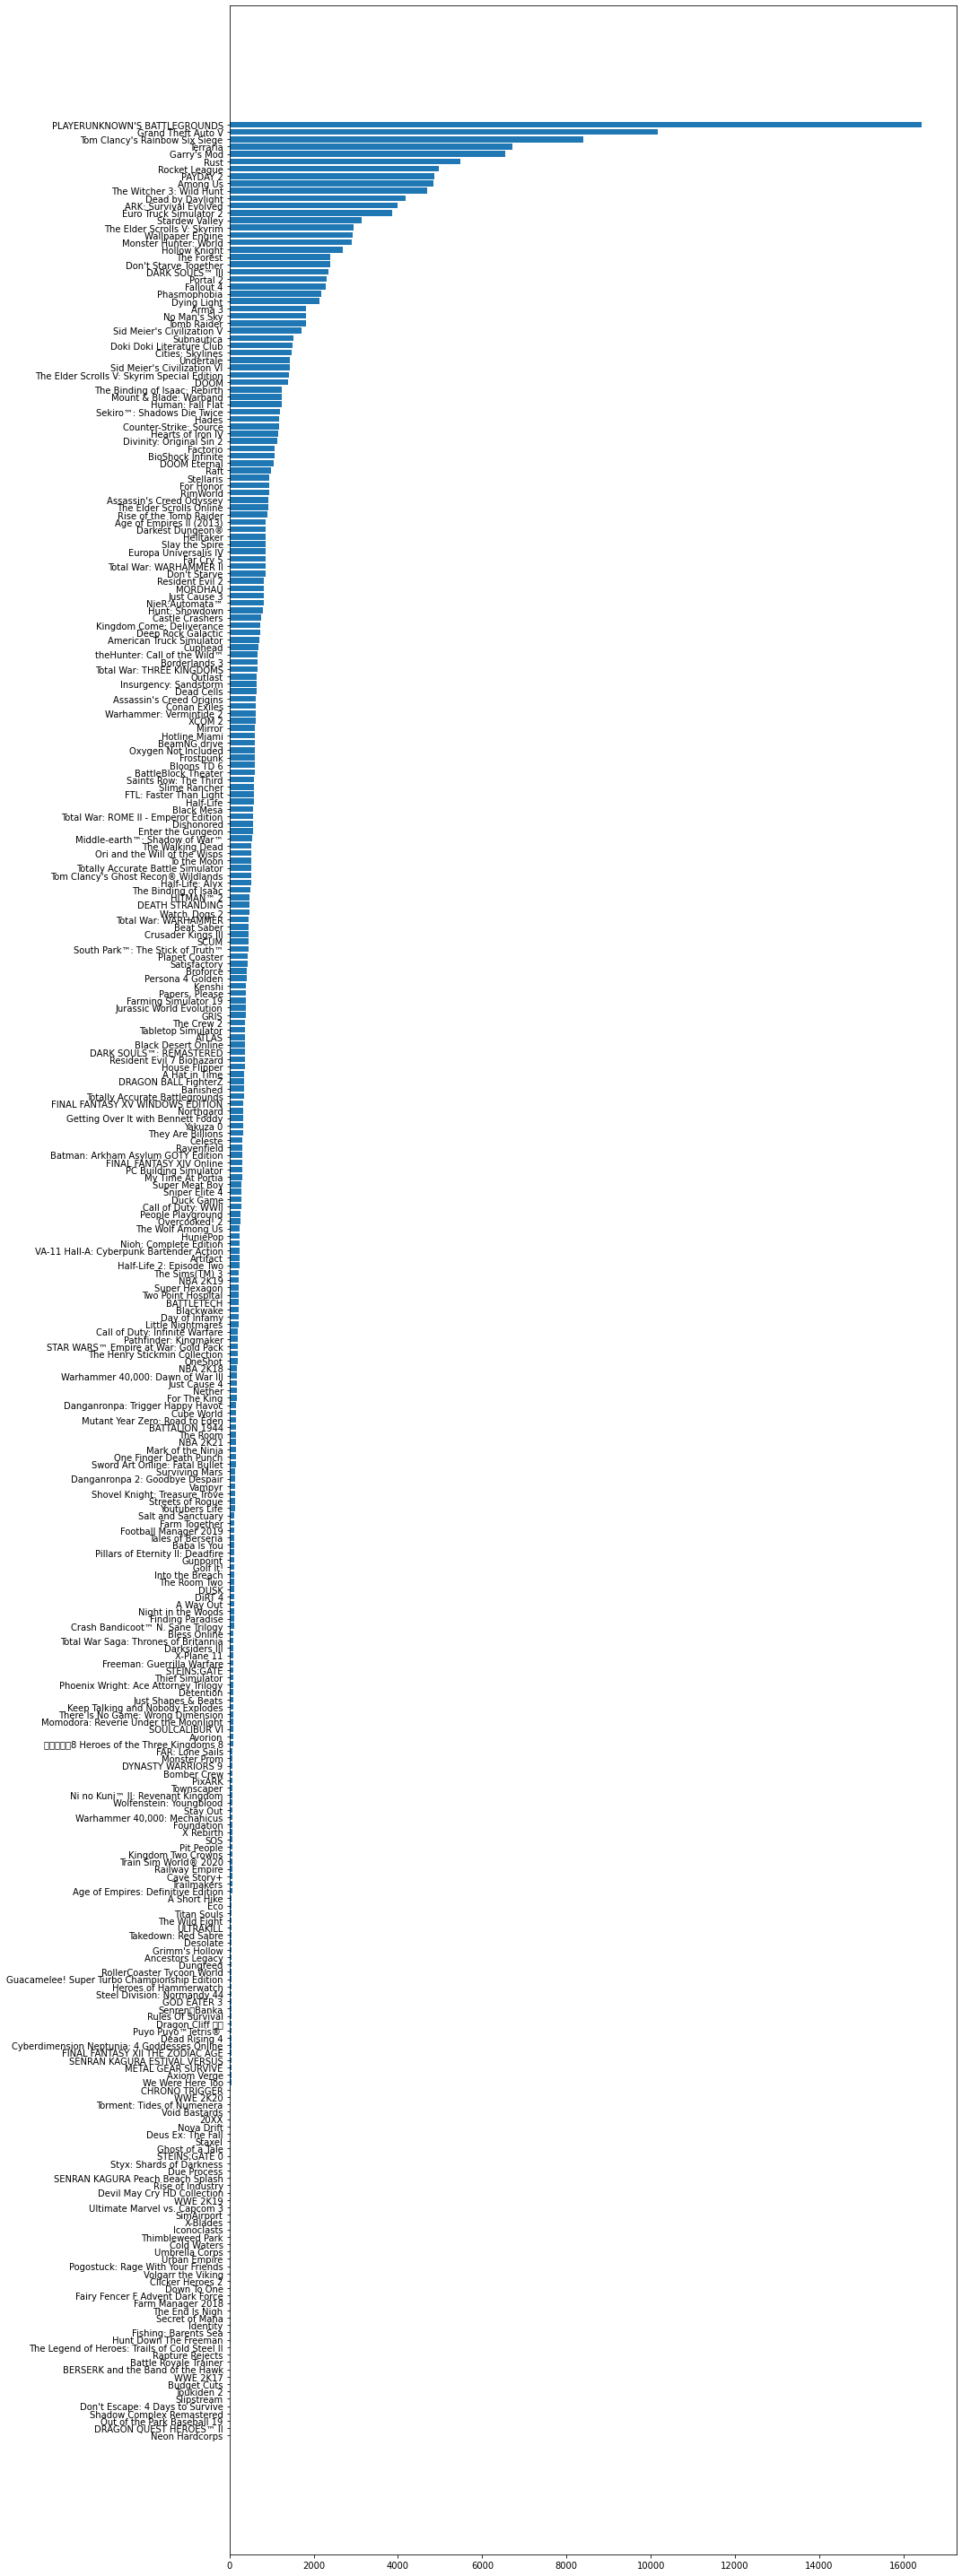

In [34]:
num_of_reviews = df.groupby('app_name')['review'].count().sort_values().to_frame()
fig, ax = plt.subplots(figsize=(15,40))
bar = ax.barh(num_of_reviews.index, num_of_reviews['review'])
plt.tight_layout()
plt.plot()

- What applications have the best Weighted Vote Score?

In [40]:
best_weighted_score = df.groupby('app_name')['weighted_vote_score'].mean().sort_values(ascending=False).to_frame().head(3)
#renaming
best_weighted_score.index.name='Game name'
best_weighted_score.rename(columns={"weighted_vote_score": "Weighted Vote Score"})

,Weighted Vote Score
Game name,
Hunt Down The Freeman,0.533353
BERSERK and the Band of the Hawk,0.479178
Identity,0.463916


- Which applications have the most recommendations?

In [49]:
most_recommendations = df.groupby('app_name')['recommended'].apply(lambda x: (x==True).sum()).sort_values(ascending=False).to_frame().head(3)
#renaming
most_recommendations.index.name='Game name'
most_recommendations.rename(columns={"recommended": "Recommended votes"})

,Recommended votes
Game name,
PLAYERUNKNOWN'S BATTLEGROUNDS,8934
Grand Theft Auto V,8335
Tom Clancy's Rainbow Six Siege,7422


- And the least recommendations?

In [102]:
least_recommendations = df.groupby('app_name')['recommended'].apply(lambda x: (x==False).sum()).sort_values(ascending=False).to_frame().head(3)
#renaming
least_recommendations.index.name='Game name'
least_recommendations.rename(columns={"recommended": "Not recommended votes"})

,Not recommended votes
Game name,
PLAYERUNKNOWN'S BATTLEGROUNDS,7508
Grand Theft Auto V,1856
Tom Clancy's Rainbow Six Siege,997


- How many of these applications were purchased, and how many were given for free?

In [168]:
# the aggregate function
agg_f = {'steam_purchase': lambda x: (x == True).sum(), 'received_for_free': lambda x: (x == True).sum()}

purchesed_or_free = df[['app_name', 'steam_purchase', 'received_for_free']].groupby('app_name').aggregate(agg_f)

#renaming
purchesed_or_free = purchesed_or_free.rename(columns={"steam_purchase": "Purchased", 'received_for_free': 'Recieved for free'})
purchesed_or_free.loc[least_recommendations.index]

,Purchased,Recieved for free
Game name,,
PLAYERUNKNOWN'S BATTLEGROUNDS,13718,593
Grand Theft Auto V,9009,377
Tom Clancy's Rainbow Six Siege,7047,370


# RQ4: Extract some information from languages

- What are the top 3 languages used to review applications?

In [4]:
top3 = list(df['language'].value_counts()[:3].index)

print("The top 3 languages are:")
for language in top3:
    print(language)

The top 3 languages are:
english
schinese
russian


- Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.

In [15]:
def lan_filter(df, lans):
    return df[df['language'].apply(lambda x: (x in lans))]

- Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

In [16]:
top3_df = lan_filter(df, top3)
votes = top3_df[top3_df['votes_funny'].apply(lambda x: x >= 1)]
perc_funny = str(round((votes.shape[0] / top3_df.shape[0] ) * 100, 2)) + '%'
print(f"The percentage of funny reviews associated with the top 3 languages is {perc_funny}")

The percentage of funny reviews associated with the top 3 languages is 12.35%


- Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [225]:
votes_helpful = top3_df[top3_df['votes_helpful'] >= 1]
perc_helpful = str(round((votes_helpful.shape[0] / top3_df.shape[0] ) * 100, 2)) + '%'
print(f"The percentage of helpful reviews associated with the top 3 languages is {perc_helpful}")

The percentage of helpful reviews associated with the top 3 languages is 29.17%


# RQ5: How often authors make reviews.

- Plot the top 10 most popular reviewers and the number of reviews.

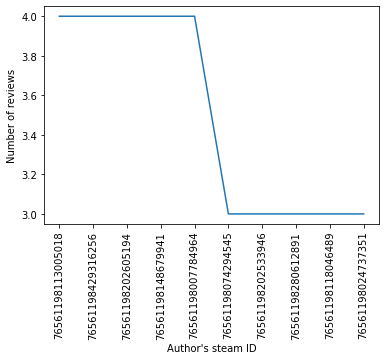

In [32]:
plt.xticks(rotation=90)
plt.xlabel("Author's steam ID")
plt.ylabel("Number of reviews")
top10reviewers = df['author.steamid'].value_counts()[:10]
x = top10reviewers.index.map(lambda x: str(x))
y = top10reviewers.values
plt.plot(x, y)

- What applications did the most popular author review?

In [9]:
top1_author = top10reviewers.index[0]
top1_author_df = df[df['author.steamid'] == top1_author]
top1_author_games = list(top1_author_df['app_name'].unique())
print("The most popular author reviewd:")
for game in top1_author_games:
    print(game)

The most popular author reviewd:
Rust
Rocket League
PLAYERUNKNOWN'S BATTLEGROUNDS
SCUM


- How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

In [12]:
p = top1_author_df[top1_author_df['steam_purchase'] == True].shape[0]
f = top1_author_df[top1_author_df['received_for_free'] == True].shape[0]

perc_p = str(round((p / top1_author_df.shape[0] ) * 100, 2)) + '%'
perc_f = str(round((f / top1_author_df.shape[0] ) * 100, 2)) + '%'

print(f"The most popular author purchased {perc_p} of it's games, and got for free {perc_f} of it's games.")

The most popular author purchased 50.0% of it's games, and got for free 25.0% of it's games.


- How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [30]:
purchased_reviewed_positively  = len(top1_author_df[(top1_author_df['steam_purchase'] == True) & (top1_author_df['recommended'] == True)])
purchased_reviewed_negatively = len(top1_author_df[(top1_author_df['steam_purchase'] == True) & (top1_author_df['recommended'] == False)])
free_reviewed_positively = len(top1_author_df[(top1_author_df['received_for_free'] == True) & (top1_author_df['recommended'] == True)])
free_reviewed_negatively = len(top1_author_df[(top1_author_df['received_for_free'] == True) & (top1_author_df['recommended'] == False)])

print(f"The most popular author:\n- reviewed positively {purchased_reviewed_positively} of the games he purchased,\n- reviewed negatively {purchased_reviewed_negatively} of the games he purchased,\n- reviewed positively {free_reviewed_positively} of the games he got for free and \n- reviewed negatively {free_reviewed_negatively} of the games he got for free.")

The most popular author:
- reviewed positively 1 of the games he purchased,
- reviewed negatively 1 of the games he purchased,
- reviewed positively 1 of the games he got for free and 
- reviewed negatively 0 of the games he got for free.


# RQ7: Computing probabilities

- What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

In [33]:
# data frame of reviews with score equal or bigger than 0.5
df_good_score = df[df['weighted_vote_score'] >= .5]

# n of reviews of the df
n_good_score = df_good_score.shape[0]

#total n of reviews
total =  df.shape[0]
print(f'The probability that a review has a Weighted Vote Score equal \
to or bigger than 0.5 is {n_good_score / total:.2%}')

The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is 21.96%


- What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

In [41]:
df_good_score_and_funny = df_good_score[df_good_score['votes_funny'] != 0]
n_good_score_and_funny =  df_good_score_and_funny.shape[0]

print(f'The probability that a review has at least one vote as funny given that \n\
the Weighted Vote Score is bigger than 0.5 is {n_good_score_and_funny / n_good_score:.2%}')

The probability that a review has at least one vote as funny given that 
the Weighted Vote Score is bigger than 0.5 is 24.72%


- Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

Two events $A$ and $B$ are independant if $P(A|B) = P(A)$.\
For events $A = \textrm{"review has at least one vote as funny"}$ and $B = \textrm{"Weighted Vote Score is bigger than 0.5"}$ indepandancy could be verified calculating $P(A)$.

In [39]:
df_funny = df[df['votes_funny'] != 0]
n_funny = df_funny.shape[0]
print(f'The probability that a review has at least one vote as funny is {n_funny / total:.2%}')

The probability that a review has at least one vote as funny is 12.04%


And so in conclusione the two events are not idependant.

# RQ 8

- Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.

Mean of the weighted vote score for the russian reviews:  0.21281539015181095
Mean of the weighted vote score for the chinese reviews:  0.14594182608739648
The mean of the weighted vote score is 0.14 for the chinese case, and 0.21 for the russian case, out of maximum 1.
This can also be backed up by the fact that there is higher concentration of chinese reviews that are between 0 and 0.1 than the russian ones in that range
It can be concluded that there is indeed some difference .


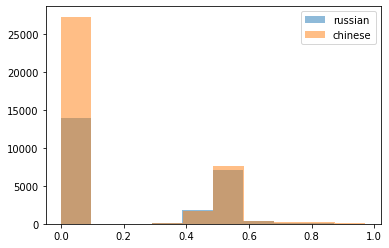

In [26]:
df_ru = lan_filter(df, ['russian'])
df_ch = lan_filter(df, ['schinese'])

ru_vals = df_ru['weighted_vote_score'].values
ch_vals = df_ch['weighted_vote_score'].values

# plt.hist([ru_vals, ch_vals], bins=7, edgecolor='black')
plt.hist(ru_vals, bins=10, label='russian', alpha=0.5)
plt.hist(ch_vals, bins=10, label='chinese', alpha=0.5)
plt.legend(loc='upper right')

print('Mean of the weighted vote score for the russian reviews: ',  str(mean(ru_vals)))
print('Mean of the weighted vote score for the chinese reviews: ',  str(mean(ch_vals)))
print('The mean of the weighted vote score is 0.14 for the chinese case, and 0.21 for the russian case, out of maximum 1.')
print('This can also be backed up by the fact that there is higher concentration of chinese reviews that are between 0 and 0.1 than the russian ones in that range')
print('It can be concluded that there is indeed some difference .')

- Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

Only take nonzero update time, otherwise its systems default behaviour
There seems to be no correlation between the two data. they both seem to behave randomly


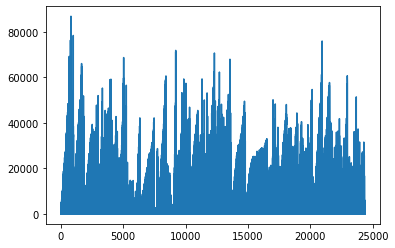

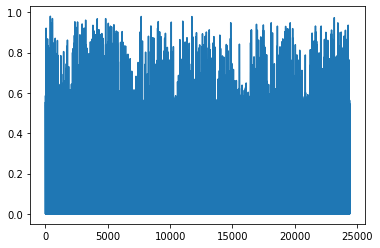

In [46]:
valid_updates = df[(df['timestamp_updated'] - df['timestamp_created'] > 0)]
print('Only take nonzero update time, otherwise its systems default behaviour')

x = (valid_updates['timestamp_updated'] - valid_updates['timestamp_created']).apply(lambda x: int(x/3600)).values
plt.figure(0)
plt.plot(x)
y = valid_updates['weighted_vote_score'].values

plt.figure(1)
plt.plot(y)
print('There seems to be no correlation between the two data. they both seem to behave randomly')


- Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

In [ ]:
nonzero_updates_p = valid_updates[valid_updates['recommended'] == True]
nonzero_updates_n = valid_updates[valid_updates['recommended'] == False]

x1 = (nonzero_updates_p['timestamp_updated'] - nonzero_updates_p['timestamp_created']).apply(lambda x: int(x/3600)).values
x2 = (nonzero_updates_n['timestamp_updated'] - nonzero_updates_n['timestamp_created']).apply(lambda x: int(x/3600)).values
y1 = nonzero_updates_p['weighted_vote_score'].values
y2 = nonzero_updates_n['weighted_vote_score'].values

plt.figure(2)
plt.plot(x1)
plt.figure(3)
plt.plot(y1)


plt.figure(4)
plt.plot(x2)

plt.figure(5)
plt.plot(y2)


print('There seems to be randomness again. The two variables are just not correlated...')

In [53]:
# What are histograms, bar plots, scatterplots and pie charts used for?

# Histograms, bar plots and scatter plots are various visualization
# method that we can find in data science. They are used to graphically
# plot data so it can be eventually easier understood.

# Histogram - it is a way to visualize data in the following way: we have 
# a number of bins n,, which means that we are going to have n rectangles
# one next to each other , evenly spread in the x axis (with equal width). 
# Each histogram's (h_i) height is going to be the number of samples that 
# have value that is in the range [h_i[0], h_i[1]], where h_i[0] and h_i[1]
# are the starting and the ending point of histogram h_i in the x axis. 
# Histograms are used to plot the distribution of the data.

# Bar plot is somewhat similar to histogram in terms of how it looks, but
# it is not the same. It compares two variables by showing, for example, 
# categories and number of samples in a specific category. Unlike
# histograms, the number of bins is fixed (depending on the categories),
# we could change the positions of the categories on the x axis, and it
# won't make difference (unlike in histogram).

# Pie chart is a often used visualization mean in data science. It is used
# to present the proportion of data classes in a circle. The whole circle
# represents the "universe", that is, all possible classes.

# Box plots are also a visualization method, they show the minimum, 
# the maximum values in groups of a sample of data, as well as the 
# median and first and third quartiles. The first quartile is the 
# number that is between the minimum and the median of the data set. 
# The third quartile is the middle number between the median and the 
# maximum value in the group. Box plots also show the outliers of the data.

